<a href="https://colab.research.google.com/github/roehrs/Bootcamp_programador_python_IGTI/blob/main/algoritmo_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # função para normalização do dataset
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
from sklearn.metrics import classification_report, confusion_matrix #importação para construção de matrix 
from mlxtend.plotting import plot_confusion_matrix # importação para plot de matrix confusão
import matplotlib.pyplot as plt

In [ ]:
#importando csv 
df_diabetes = pd.read_csv('datasets_diabetes.csv')

In [ ]:
#transforma os dados em array
entradas = df_diabetes.iloc[:, :-1].values  #dados de entrada
saida = df_diabetes.iloc[:, 8].values  # saídas ou target

In [ ]:
# realiza o processo de normalização dos dados
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(entradas)

In [ ]:
# realiza a visisão dos dados entre treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, 
                                                    test_size=0.30,random_state=42)

In [ ]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)

In [ ]:
#realiza o fit do modelo
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#realiza a previsão
y_pred=clf.predict(X_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[118  33]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.61      0.64      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



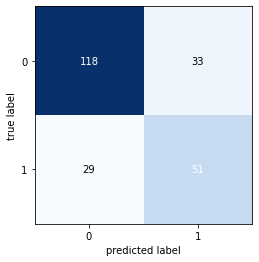

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()